<a href="https://colab.research.google.com/github/pahwa1902/LearMachineLearning/blob/master/MachineLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
!git clone https://github.com/pahwa1902/LearMachineLearning.git



Cloning into 'LearMachineLearning'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [0]:
import matplotlib.pyplot as plt

In [0]:
! ls LearMachineLearning

HDFCBANK.csv  Untitled6.ipynb


In [0]:
data = pd.read_csv("LearMachineLearning/HDFCBANK.csv")

In [11]:
data_pd = pd.DataFrame(data)
data_pd.head()
print(data_pd.columns)
data_pd['avgprice'] = data_pd['Average Price']
data_pd['volume'] = data_pd['Total Traded Quantity']
data_pd['totaltraded'] = data_pd['Total Traded Quantity']

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty', 'avgprice', 'volume', 'totaltraded'],
      dtype='object')


In [12]:
data_hd=data_pd[data_pd['Series']=="EQ"]
mean=data_hd[-90:]['Average Price'].mean()
maximum = data_hd[-90:]['Average Price'].max()
minimum= data_hd[-90:]['Average Price'].min()
index = [i for i in range(len(data_pd))]
print(len(index))
data_hdfc = pd.DataFrame(data_hd,index)

print(data_hdfc)

609
       Symbol Series         Date  ...  avgprice     volume  totaltraded
0    HDFCBANK     EQ  15-May-2017  ...   1550.73   701195.0     701195.0
1         NaN    NaN          NaN  ...       NaN        NaN          NaN
2    HDFCBANK     EQ  16-May-2017  ...   1555.11   897594.0     897594.0
3    HDFCBANK     EQ  17-May-2017  ...   1557.51   868118.0     868118.0
4         NaN    NaN          NaN  ...       NaN        NaN          NaN
..        ...    ...          ...  ...       ...        ...          ...
604  HDFCBANK     EQ  07-May-2019  ...   2338.90  2481051.0    2481051.0
605  HDFCBANK     EQ  08-May-2019  ...   2304.51  3016052.0    3016052.0
606  HDFCBANK     EQ  09-May-2019  ...   2287.67  2256931.0    2256931.0
607  HDFCBANK     EQ  10-May-2019  ...   2306.93  2648550.0    2648550.0
608  HDFCBANK     EQ  13-May-2019  ...   2297.73  2767908.0    2767908.0

[609 rows x 18 columns]


In [15]:

data_hdfc['Date'] = pd.to_datetime(data_hdfc['Date'])
print(data_hdfc['Date'].dtype)

datetime64[ns]


In [0]:
data_hdfc = data_hdfc.dropna()
data_hdfc = data_hdfc.reset_index(drop=True)


In [0]:
date = data_hdfc['Date']
month = []
year = []
for i in range(0,len(data_hdfc)):
  
  datee = date[i].split("-")
  month.append(datee[1])
  year.append(datee[2])
data_hdfc['month'] = month
data_hdfc['year'] = year

In [39]:
data_hdfc['pricevolume'] = data_hdfc['avgprice']*data_hdfc['volume']

data_hdf = data_hdfc.groupby(['year','month']).pricevolume.agg([sum])
data_hdf['vol'] = data_hdfc.groupby(['year','month']).volume.agg([sum])
data_hdf['vwap'] = data_hdf['sum']/data_hdf['vol']
print(data_hdf)

                     sum         vol         vwap
year month                                       
2018 Aug    1.077925e+11  51416350.0  2096.463573
     Dec    9.979939e+10  47497880.0  2101.133629
     Feb    5.218904e+10  27602788.0  1890.716324
     Jan    6.878462e+10  35760436.0  1923.483737
     Jul    1.100811e+11  51000163.0  2158.446639
     Jun    1.785253e+11  85691101.0  2083.359050
     Mar    5.284261e+10  28352209.0  1863.791575
     May    8.025579e+10  39518909.0  2030.820000
     Nov    1.376557e+11  68777510.0  2001.463649
     Oct    1.628201e+11  82731593.0  1968.051768
     Sep    1.106056e+11  55430133.0  1995.405673
2019 Apr    1.754716e+11  77276083.0  2270.709955
     Feb    9.110229e+10  43148609.0  2111.360923
     Jan    1.158254e+11  55045470.0  2104.177583
     Mar    1.620369e+11  72835637.0  2224.692286
     May    5.581139e+10  23987720.0  2326.665017


In [0]:
def avgp(days):
  data_days = data_hdfc[-days:]
  return sum(data_days['avgprice'])/days

def avg(days):
  
  return (data_days[-1]['Close Price']/data_days[-days]['Close Price']-1)*100

In [18]:
closing = data_hdfc['Close Price']
data_hdfc['day_perc_change'] = closing.pct_change()
data_hdfc['day_perc_change'][0] = 0

data_hdfc = data_hdfc.reindex(columns=data_hdfc.columns.tolist() + ['trend'])
print(data_hdfc)

       Symbol Series       Date  ...   pricevolume  day_perc_change  trend
0    HDFCBANK     EQ 2017-05-15  ...  1.087364e+09         0.000000    NaN
1    HDFCBANK     EQ 2017-05-16  ...  1.395857e+09         0.004023    NaN
2    HDFCBANK     EQ 2017-05-17  ...  1.352102e+09        -0.001603    NaN
3    HDFCBANK     EQ 2017-05-18  ...  1.209501e+09        -0.000032    NaN
4    HDFCBANK     EQ 2017-05-19  ...  1.110922e+09         0.002665    NaN
..        ...    ...        ...  ...           ...              ...    ...
489  HDFCBANK     EQ 2019-05-07  ...  5.802930e+09        -0.002620    NaN
490  HDFCBANK     EQ 2019-05-08  ...  6.950522e+09        -0.006502    NaN
491  HDFCBANK     EQ 2019-05-09  ...  5.163113e+09        -0.007086    NaN
492  HDFCBANK     EQ 2019-05-10  ...  6.110019e+09         0.002444    NaN
493  HDFCBANK     EQ 2019-05-13  ...  6.359905e+09        -0.004050    NaN

[494 rows x 23 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
for i in range(len(data_hdfc)):
  if(-0.5<data_hdfc['day_perc_change'][i]<0.5):
    data_hdfc['trend'][i]= 'Slight or No change'
  if(0.5<data_hdfc['day_perc_change'][i]<1):
    data_hdfc['trend'][i]= 'Slight positive'
  if(-1<data_hdfc['day_perc_change'][i]<-0.5):
    data_hdfc['trend'][i] = 'Slight negative'
  if(1<data_hdfc['day_perc_change'][i]<3):
    data_hdfc['trend'][i] = 'Positive'
  if(-3<data_hdfc['day_perc_change'][i]<-1):
    data_hdfc['trend'][i] = 'Negative'
  if(3<data_hdfc['day_perc_change'][i]<7):
    data_hdfc['trend'][i] = 'Among top gainers'
  if(-7<data_hdfc['day_perc_change'][i]<-3):
    data_hdfc['trend'][i] = 'Among top losers'
  if(data_hdfc['day_perc_change'][i]>7):
    data_hdfc['trend'][i] = 'Bull run'
  if(data_hdfc['day_perc_change'][i]<-7):
    data_hdfc['trend'][i] = 'Bear drop'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
set(data_hdfc['trend'])

{'Slight or No change'}

In [20]:
data_trend = data_hdfc.groupby('trend').totaltraded.agg(['sum','median'])
data_trend['size'] = data_hdfc.groupby('trend').size()
data_trend['avg'] = data_trend['sum']/data_trend['size']
print(data_trend)

                              sum     median  size           avg
trend                                                           
Slight or No change  1.097272e+09  1773904.5   494  2.221199e+06


In [21]:

data_hdfc.reset_index(inplace=True)

data_hdfc.set_index('Date',inplace=True)
print(data_hdfc.index.dtype)

datetime64[ns]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


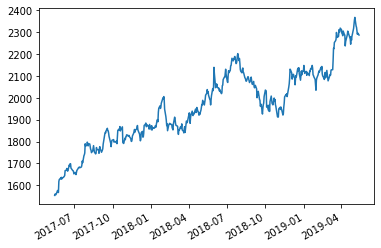

In [22]:
fig, ax = plt.subplots()

plt.plot(data_hdfc.index,data_hdfc['Close Price'])
#plt.xticks(datee)
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


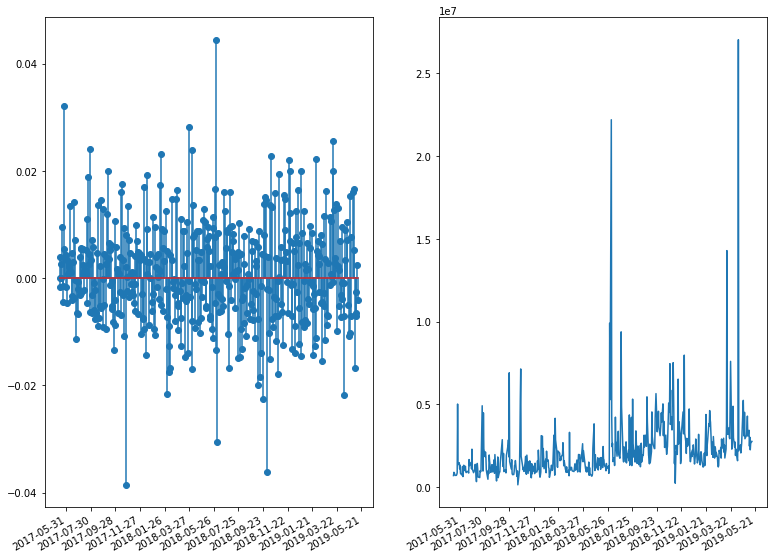

In [25]:
fig = plt.figure(figsize=(20,10))
#fig, ax = plt.subplots()
ax1 = plt.subplot(131)
ax1.stem(data_hdfc.index,data_hdfc['day_perc_change'])

ax2 = plt.subplot(132)
ax2.plot(data_hdfc.index,data_hdfc['volume'])

ax1.xaxis_date()
ax1.xaxis.set_major_locator(plt.MaxNLocator(15))
ax2.xaxis_date()
ax2.xaxis.set_major_locator(plt.MaxNLocator(15))
fig.autofmt_xdate()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x7f87dde2b358>],
 [Text(-1.1, 1.3471114790620887e-16, 'Slight or No change')])

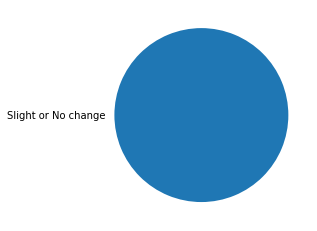

In [128]:

data_tr= data_hdfc.groupby(['trend']).size().reset_index(name='size')
size = []
for i in data_hdfc['trend'].unique():
  sizee = data_tr[data_tr['trend']==i]
  size.append(sizee['size']/len(data_hdfc)*100)

plt.pie(size,labels=data_hdfc['trend'].unique())


<BarContainer object of 1 artists>

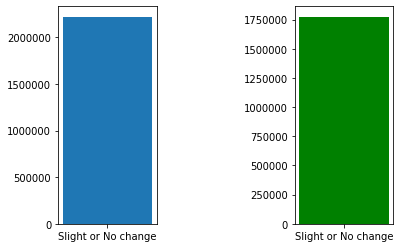

In [147]:
data_total = data_hdfc.groupby('trend').totaltraded.agg(['sum','median']).reset_index()
data_size = data_hdfc.groupby('trend').size().reset_index(name='size')
data_total['size'] = data_size['size']
data_total['avg'] = data_total['sum']/data_total['size']
ax1 = plt.subplot(131)
ax1.bar(data_total['trend'],height=data_total['avg'])
ax2 = plt.subplot(133)
ax2.bar(data_total['trend'],height=data_total['median'],color='green')